# I2A2_TAREFA6
### Lixo eletronico na amazonia

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Atividade 1: Exploração inicial dos dados

In [ ]:
# Leitura do arquivo CSV

df = pd.read_csv("desafio6_lixo_eletronico.csv")

In [42]:
print("Tamanho do DataFrame (linhas, colunas):")
df.shape

Tamanho do DataFrame (linhas, colunas):


(150, 11)

In [47]:
print("Informações do DataFrame:")
df.info()

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Registro          150 non-null    int64  
 1   Tipo_Eletronico      135 non-null    object 
 2   Ano_Fabricacao       150 non-null    int64  
 3   Origem               135 non-null    object 
 4   Destino_Final        135 non-null    object 
 5   Peso_kg              135 non-null    float64
 6   Nivel_Toxico         150 non-null    object 
 7   Custo_Reciclagem_R$  135 non-null    float64
 8   Municipio            150 non-null    object 
 9   Educacao_Ambiental   150 non-null    object 
 10  Data_Descarte        150 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 13.0+ KB


In [48]:
print("Descrição estatística:")
df.describe(include="all")

Descrição estatística:


,ID_Registro,Tipo_Eletronico,Ano_Fabricacao,Origem,Destino_Final,Peso_kg,Nivel_Toxico,Custo_Reciclagem_R$,Municipio,Educacao_Ambiental,Data_Descarte
count,150.000000,135,150.000000,135,135,135.000000,150,135.000000,150,150,150
unique,NaN,8,NaN,5,6,NaN,4,NaN,27,2,90
top,NaN,Bateria,NaN,Governamental,Lixão,NaN,Alto,NaN,Belém,Sim,2019-10-30 21:25:22.147651008
freq,NaN,25,NaN,45,34,NaN,41,NaN,24,88,5
mean,72.733333,NaN,2008.646667,NaN,NaN,25.515556,NaN,103.102667,NaN,NaN,NaN
std,43.163443,NaN,8.833384,NaN,NaN,13.916280,NaN,56.242941,NaN,NaN,NaN
min,1.000000,NaN,1995.000000,NaN,NaN,1.710000,NaN,5.510000,NaN,NaN,NaN
25%,36.250000,NaN,2000.250000,NaN,NaN,13.840000,NaN,51.845000,NaN,NaN,NaN
50%,70.500000,NaN,2009.000000,NaN,NaN,24.180000,NaN,108.710000,NaN,NaN,NaN
75%,109.750000,NaN,2017.000000,NaN,NaN,36.880000,NaN,149.630000,NaN,NaN,NaN


In [53]:
print("Quantidade de linhas duplicadas:", df.duplicated().sum())

Quantidade de linhas duplicadas: 0


In [ ]:
print("Quantidade de valores nulos por coluna")
df.isnull().sum()

Qunatidade de valores nulos por coluna


ID_Registro             0
Tipo_Eletronico        15
Ano_Fabricacao          0
Origem                 15
Destino_Final          15
Peso_kg                15
Nivel_Toxico            0
Custo_Reciclagem_R$    15
Municipio               0
Educacao_Ambiental      0
Data_Descarte           0
dtype: int64

In [59]:
# Identificar valores únicos em cada coluna

for coluna in df.columns:
    print(f"{coluna}:")
    print(df[coluna].unique())
    print("-" * 40)

ID_Registro:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  15  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  30  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  45  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112
 113 114 115 116 117 118 119  60 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 136 137 138 139 140 141 142 143 144 145 146 147 148 149
  75]
----------------------------------------
Tipo_Eletronico:
['Impressora' 'Bateria' 'Geladeira' 'Tv' nan 'Computador' 'Celular'
 'Tablet']
----------------------------------------
Ano_Fabricacao:
[2006 2002 2016 2021 1997 1995 1999 2009 2008 2020 2017 2001 2003 2004
 2022 2007 2013 2011 2014 1998 2005 1996 2019 2015 2000 2018 2010]
----------------------------------------
Origem:
['Urbana' 'Gover

## Atividade 2 - Limpeza e padronização

In [ ]:
# Padronização de colunas categóricas
df["Tipo_Eletronico"] = df["Tipo_Eletronico"].str.strip().str.title()
df["Origem"] = df["Origem"].replace("urbano", "Urbana")
df["Destino_Final"] = df["Destino_Final"].str.strip().str.title()
df["Nivel_Toxico"] = df["Nivel_Toxico"].str.strip().str.title()
df["Municipio"] = df["Municipio"].str.strip().str.title()

In [60]:
# Preenchimento de valores nulos em colunas categóricas com 'Desconhecido'
colunas_categoricas = ["Tipo_Eletronico", "Origem", "Destino_Final"]
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].fillna("Desconhecido")

In [61]:
# Preenchimento de valores nulos em colunas numéricas com a mediana da coluna
colunas_numericas = ["Peso_kg", "Custo_Reciclagem_R$"]
for coluna in colunas_numericas:
    mediana = df[coluna].median()
    df[coluna] = df[coluna].fillna(mediana)

## Distribuição e Frequencias

Tipo_Eletronico
Bateria         25
Celular         21
Geladeira       20
Computador      20
Impressora      18
Tablet          17
Desconhecido    15
Tv              14
Name: count, dtype: int64


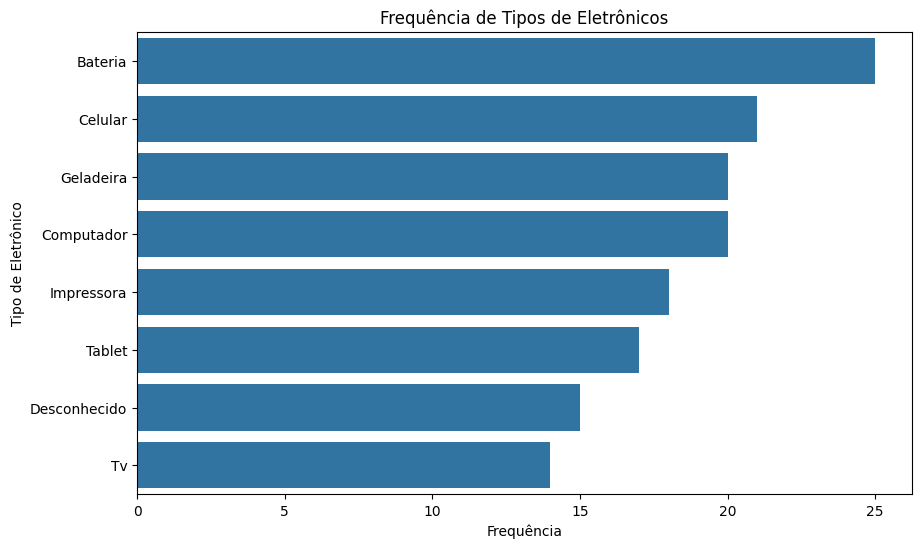

In [ ]:
# Frequência de tipos de eletrônicos

frequencia_tipos = df['Tipo_Eletronico'].value_counts()
print(frequencia_tipos)

plt.figure(figsize=(10,6))
sns.barplot(x=frequencia_tipos.values, y=frequencia_tipos.index)
plt.xlabel('Frequência')
plt.ylabel('Tipo de Eletrônico')
plt.title('Frequência de Tipos de Eletrônicos')
plt.show()

Origem
Governamental    45
Urbana           35
Industrial       28
Rural            27
Desconhecido     15
Name: count, dtype: int64


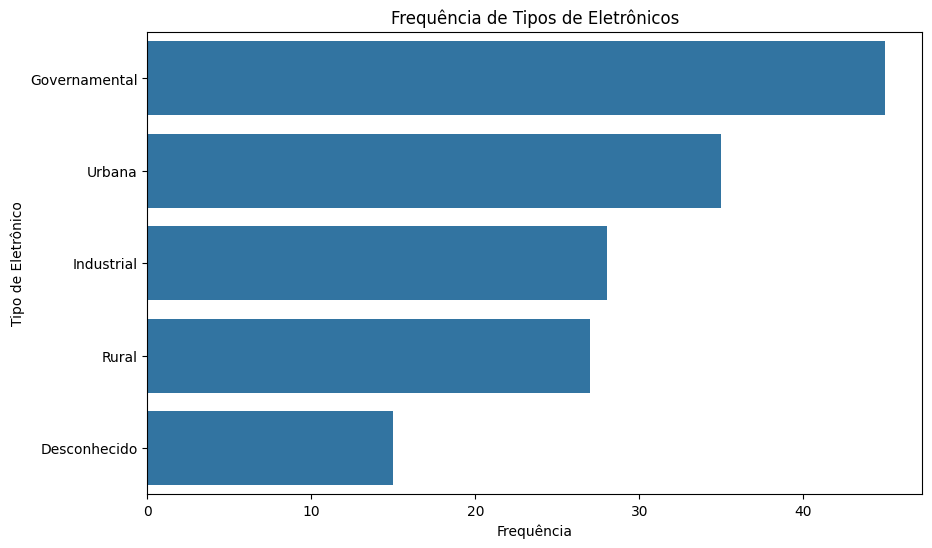

In [78]:
# Frequência de cada origem
frequencia_origem = df["Origem"].value_counts()
print(frequencia_origem)

plt.figure(figsize=(10,6))
sns.barplot(x=frequencia_origem.values, y=frequencia_origem.index)
plt.xlabel('Frequência')
plt.ylabel('Tipo de Eletrônico')
plt.title('Frequência de Tipos de Eletrônicos')
plt.show()

## Atividade 4 - Análise Temporal de Descarte

In [ ]:
# transformar a coluna de data de descarte em datetime

df["Data_Descarte"] = pd.to_datetime(df["Data_Descarte"])

0     2022-09-02 11:26:10.469798656
1     2023-03-03 01:17:18.926174496
2     2021-08-09 09:10:52.348993280
3     2018-04-08 05:18:55.570469792
4     2021-12-17 01:55:58.389261728
                   ...             
145   2017-11-29 12:33:49.530201344
146   2025-01-05 11:35:50.335570496
147   2023-08-05 16:35:26.174496640
148   2024-05-17 00:38:39.463087232
149   2020-04-03 12:43:29.395973152
Name: Data_Descarte, Length: 150, dtype: datetime64[ns]

In [87]:
# adicionar uma nova coluna para o mes de descastes e outra para o ano de descarte

df["Mes_Descarte"] = df["Data_Descarte"].dt.month_name()
df["Ano_Descarte"] = df["Data_Descarte"].dt.year

In [89]:
df["Mes_Ano_Descarte"] = df["Data_Descarte"].dt.to_period("M")

In [90]:
df

,ID_Registro,Tipo_Eletronico,Ano_Fabricacao,Origem,Destino_Final,Peso_kg,Nivel_Toxico,Custo_Reciclagem_R$,Municipio,Educacao_Ambiental,Data_Descarte,Mes_Descarte,Ano_Descarte,Mes_Ano_Descarte
0,1,Impressora,2006,Urbana,Aterro Controlado,30.95,Alto,122.38,Marabá,Não,2022-09-02 11:26:10.469798656,September,2022,2022-09
1,2,Bateria,2002,Urbana,Aterro Controlado,16.89,Alto,48.65,Novo Progresso,Sim,2023-03-03 01:17:18.926174496,March,2023,2023-03
2,3,Geladeira,2016,Governamental,Cooperativa,32.82,Baixo,165.25,Tucuruí,Sim,2021-08-09 09:10:52.348993280,August,2021,2021-08
3,4,Impressora,2021,Governamental,Reciclagem Formal,19.33,Baixo,72.29,Cametá,Não,2018-04-08 05:18:55.570469792,April,2018,2018-04
4,5,Tv,1997,Industrial,Lixão,34.11,Baixo,72.79,Ananindeua,Não,2021-12-17 01:55:58.389261728,December,2021,2021-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Desconhecido,1997,Industrial,Aterro Controlado,24.07,Alto,90.56,Belém,Sim,2017-11-29 12:33:49.530201344,November,2017,2017-11
146,147,Impressora,2013,Desconhecido,Rio,49.27,Alto,117.61,Cametá,Não,2025-01-05 11:35:50.335570496,January,2025,2025-01
147,148,Tablet,2014,Urbana,Lixão,18.90,Baixo,74.30,Castanhal,Sim,2023-08-05 16:35:26.174496640,August,2023,2023-08
148,149,Geladeira,2001,Governamental,Aterro Controlado,37.50,Crítico,81.34,Belém,Sim,2024-05-17 00:38:39.463087232,May,2024,2024-05


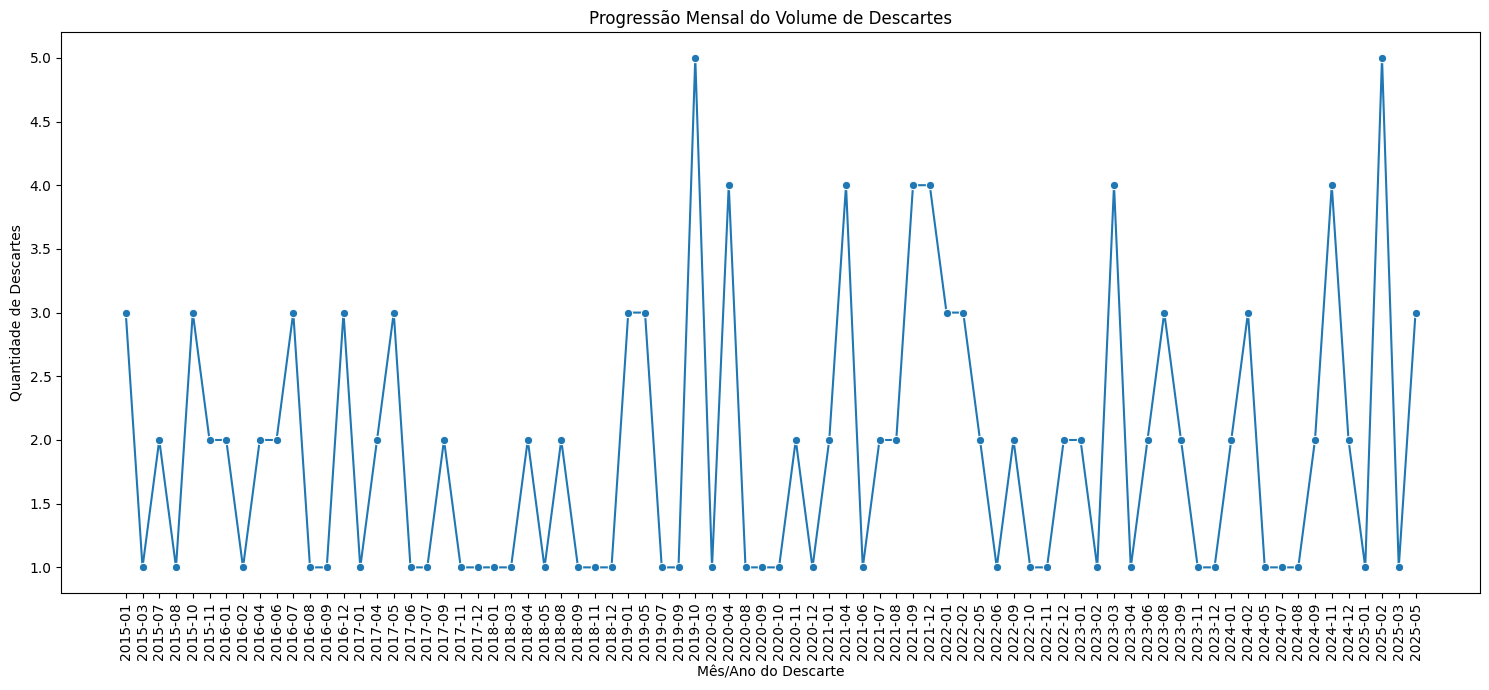

In [ ]:
# grafico de linha mostrando a evolucao mensal do volume de descartes

volume_mensal = df.groupby('Mes_Ano_Descarte').size().sort_index()
volume_mensal.index = volume_mensal.index.astype(str)

plt.figure(figsize=(15,7))
sns.lineplot(x=volume_mensal.index.astype(str), y=volume_mensal.values, marker='o')
plt.xlabel('Mês/Ano do Descarte')
plt.ylabel('Quantidade de Descartes')
plt.title('Progressão Mensal do Volume de Descartes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Atividade 5 -  Agregação por Município

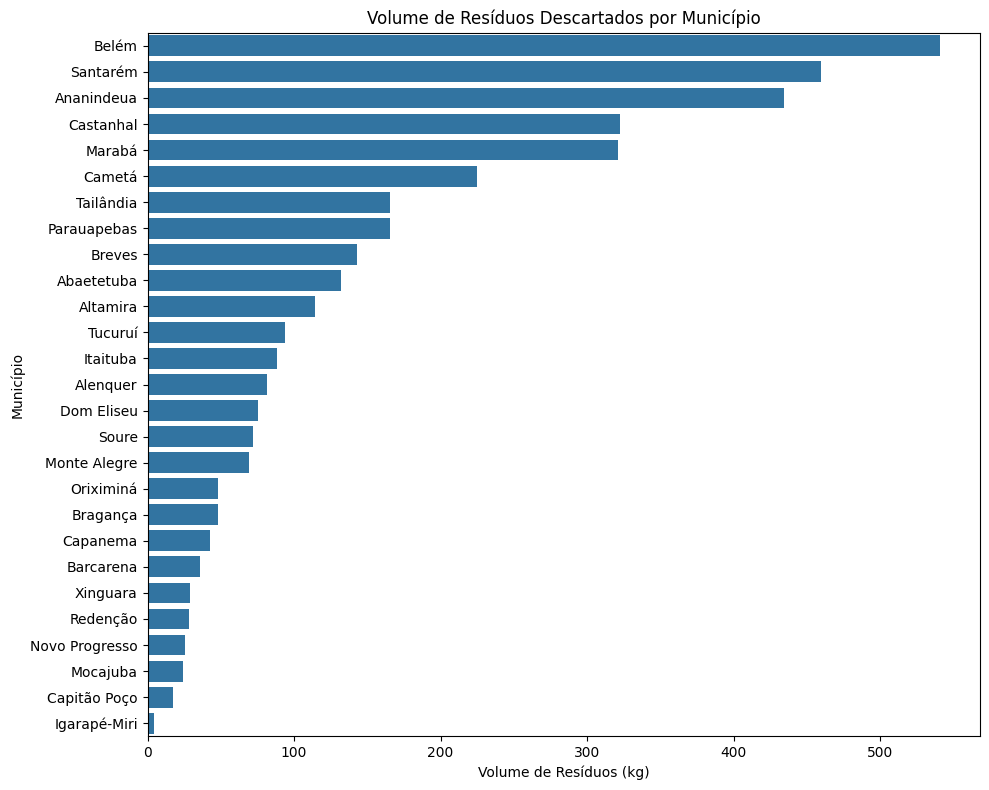

In [ ]:
# Total de residuos descartados por municipio

residuos_municipio = df.groupby('Municipio')['Peso_kg'].sum().sort_values(ascending=False)
print(residuos_municipio)

plt.figure(figsize=(10,8))
sns.barplot(x=residuos_municipio.values, y=residuos_municipio.index, orient='h')
plt.xlabel('Volume de Resíduos (kg)')
plt.ylabel('Município')
plt.title('Volume de Resíduos Descartados por Município')
plt.tight_layout()

Municipio
Oriximiná         47.940000
Bragança          47.840000
Breves            35.817500
Monte Alegre      34.535000
Tailândia         33.116000
Abaetetuba        32.955000
Tucuruí           31.356667
Xinguara          29.110000
Santarém          28.727500
Altamira          28.537500
Cametá            28.093750
Castanhal         26.868333
Marabá            26.770833
Ananindeua        25.557647
Mocajuba          24.180000
Soure             23.916667
Parauapebas       23.597143
Belém             22.549167
Itaituba          22.042500
Capanema          21.160000
Alenquer          20.465000
Dom Eliseu        18.890000
Redenção          14.230000
Barcarena         11.913333
Capitão Poço       8.700000
Novo Progresso     8.626667
Igarapé-Miri       4.230000
Name: Peso_kg, dtype: float64


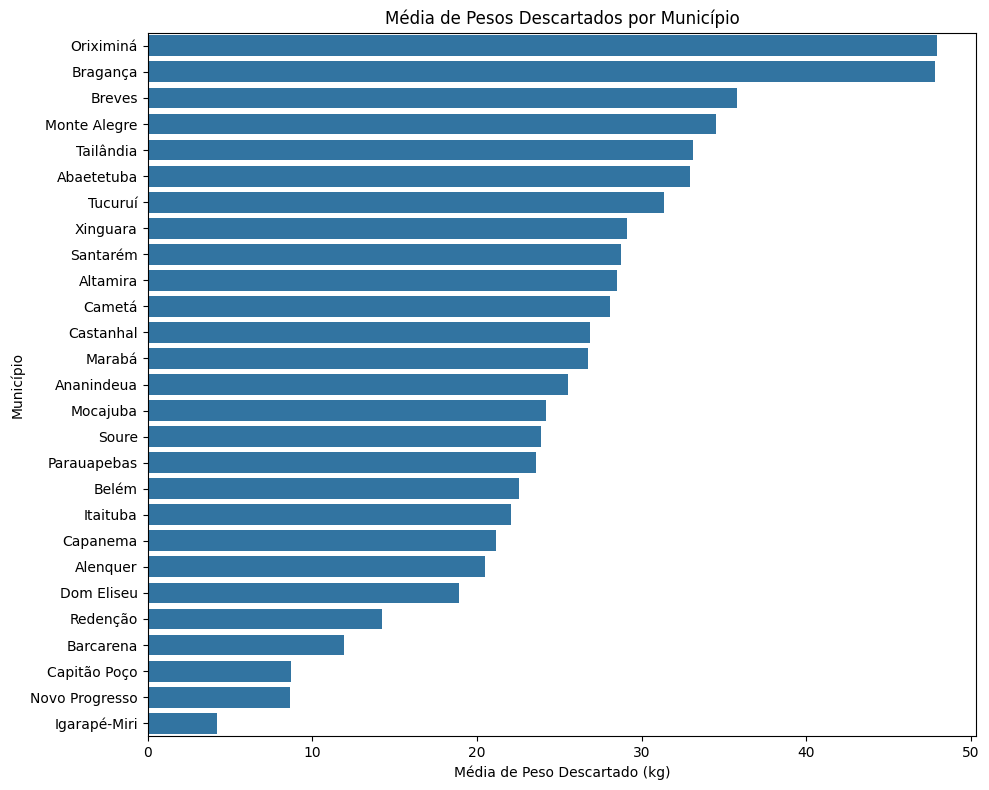

In [108]:
# Média de pesos descartados por municipio
media_peso_municipio = df.groupby('Municipio')['Peso_kg'].mean().sort_values(ascending=False)
print(media_peso_municipio)

# ...existing code...
# Gráfico de barras horizontais mostrando a média de pesos descartados por município
plt.figure(figsize=(10,8))
sns.barplot(x=media_peso_municipio.values, y=media_peso_municipio.index, orient='h')
plt.xlabel('Média de Peso Descartado (kg)')
plt.ylabel('Município')
plt.title('Média de Pesos Descartados por Município')
plt.tight_layout()
plt.show()
#

Tipo_Destino    Proporcao_Formal  Proporcao_Informal
Municipio                                           
Abaetetuba              0.750000            0.000000
Alenquer                0.500000            0.500000
Altamira                0.250000            0.750000
Ananindeua              0.352941            0.529412
Barcarena               1.000000            0.000000
Belém                   0.333333            0.583333
Bragança                1.000000            0.000000
Breves                  0.250000            0.750000
Cametá                  0.500000            0.500000
Capanema                0.000000            1.000000
Capitão Poço            0.500000            0.500000
Castanhal               0.666667            0.250000
Dom Eliseu              1.000000            0.000000
Igarapé-Miri            1.000000            0.000000
Itaituba                0.250000            0.500000
Marabá                  0.583333            0.416667
Mocajuba                1.000000            0.

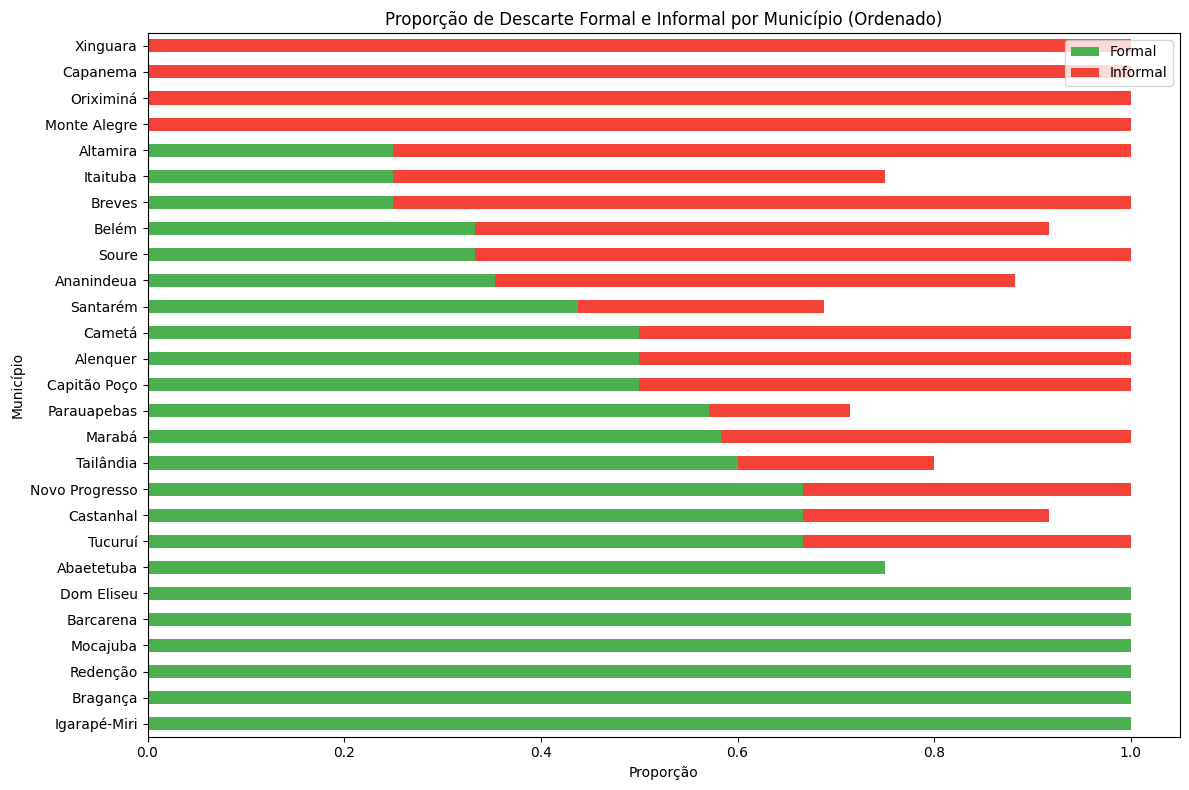

In [119]:
# Proporção de destinos formais e informais por município (versão reduzida)
df['Tipo_Destino'] = df['Destino_Final'].map(
    lambda x: 'Formal' if x in ['Aterro Controlado', 'Cooperativa', 'Reciclagem Formal']
    else 'Informal' if x in ['Lixão', 'Rio']
    else 'Desconhecido'
)
proporcao = df.groupby(['Municipio', 'Tipo_Destino']).size().unstack(fill_value=0)
proporcao['Total'] = proporcao.sum(axis=1)
for tipo in ['Formal', 'Informal']:
    proporcao[f'Proporcao_{tipo}'] = proporcao.get(tipo, 0) / proporcao['Total']
print(proporcao[['Proporcao_Formal', 'Proporcao_Informal']])


# Gráfico de barras horizontais mostrando a proporção de destinos formais e informais por município (ordenado)

proporcao_sorted = proporcao.sort_values(by='Proporcao_Formal', ascending=False)
proporcao_plot = proporcao_sorted[['Proporcao_Formal', 'Proporcao_Informal']]

proporcao_plot.plot(kind='barh', stacked=True, color=['#4CAF50', '#F44336'], figsize=(12,8))
plt.xlabel('Proporção')
plt.ylabel('Município')
plt.title('Proporção de Descarte Formal e Informal por Município (Ordenado)')
plt.legend(['Formal', 'Informal'])
plt.tight_layout()
plt.show()

## Atividade 6 - Cruzamento entre Tipo de Eletrônico e Destino

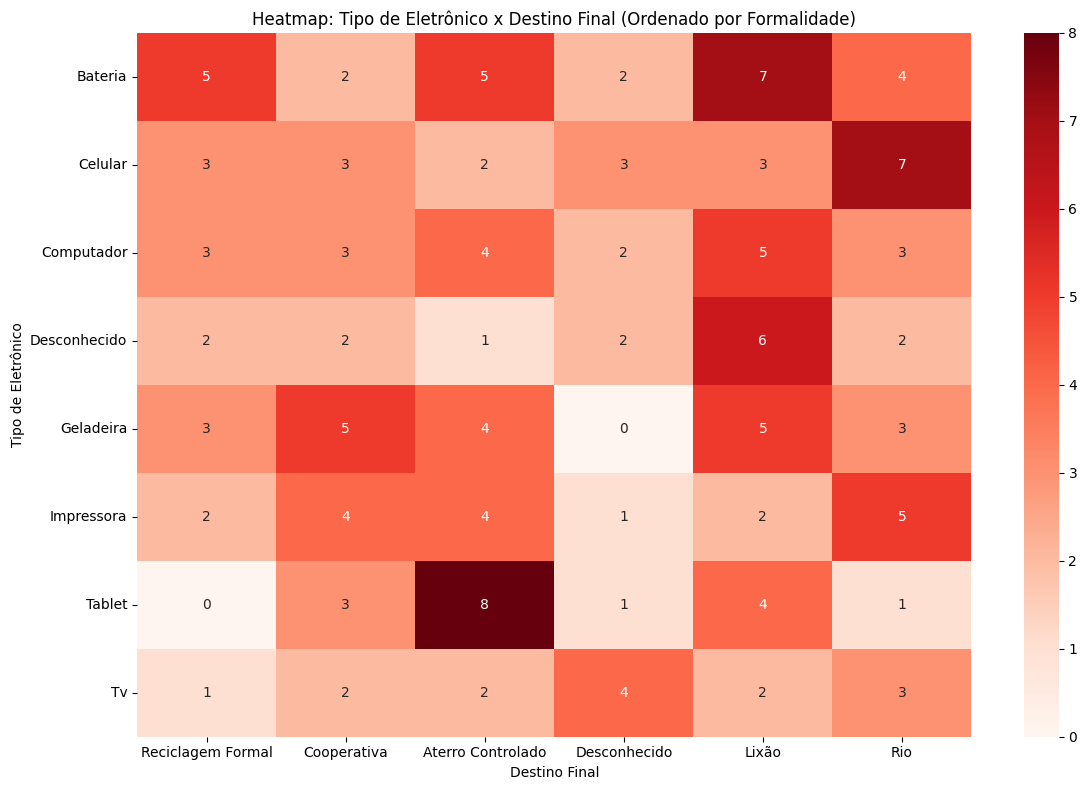

In [ ]:
# Tabela cruzada entre Tipo de Eletrônico e Destino_Final
tabela_cruzada = pd.crosstab(df['Tipo_Eletronico'], df['Destino_Final'])

plt.figure(figsize=(12,8))
sns.heatmap(tabela_cruzada, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap: Tipo de Eletrônico x Destino Final')
plt.xlabel('Destino Final')
plt.ylabel('Tipo de Eletrônico')
plt.tight_layout()
plt.show()

## Atividade 7 – Impacto do Peso dos Resíduos no Meio Ambiente